Implement a collection of methods that enable us to collect and classify sentiment in quotes by every member of *The Office*.

In [105]:
# import libraries used for this task

# data
import pandas as pd # for dataframe
import requests # to send HTTP requests
import json # to handle API data

# to apply VADER’s sentiment intensity analyzer
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# to compute the semantic similarity of quotes
# (challenge - ran out of time)
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer

# data visualization
import matplotlib.pyplot as plt # for charts
import seaborn as sns # for charts

To collect the quotes, we need to call the API more than once — there's a response limit of one quote at a time.

In [106]:
# collect all the quote data from the API
quotes = []
for num_quote in range(1, 299): # there are a total of 298 quotes
  quote = requests.get(
      'https://officeapi.akashrajpurohit.com/quote/{}'.format(num_quote))
  # accounting for status codes and encodings of responses
  if (quote.status_code == 200):
    quotes.append(quote.json())

# store the collected API responses as a dataframe,
# where each response is a row
quotes_df = pd.DataFrame(quotes)

Once we have every quote, we need to clean the text as preparation for sentiment analysis.

In [107]:
# Clean the quote text only to the extent recommended for the VADER model.
clean_quotes = quotes_df.loc[:,'quote'].tolist()

In [108]:
# Apply VADER’s sentiment intensity analyzer to every quote
# and use the scores to label each text
# as either positive, neutral, or negative.
quote_labels = []
analyzer = SentimentIntensityAnalyzer()
for clean_quote in clean_quotes:
    vs = analyzer.polarity_scores(clean_quote)
    # Typical threshold values
    # (used in the literature cited on the VADER page)
    if (vs['compound'] >= 0.05):
        quote_labels.append('Positive')
    elif (vs['compound'] <= - 0.05):
        quote_labels.append('Negative')
    else:
        quote_labels.append('Neutral')

Charts to visualize data.

In [110]:
# new dataframe with added sentiment labels
quotes_labels_df = quotes_df.assign(sentiment=quote_labels)

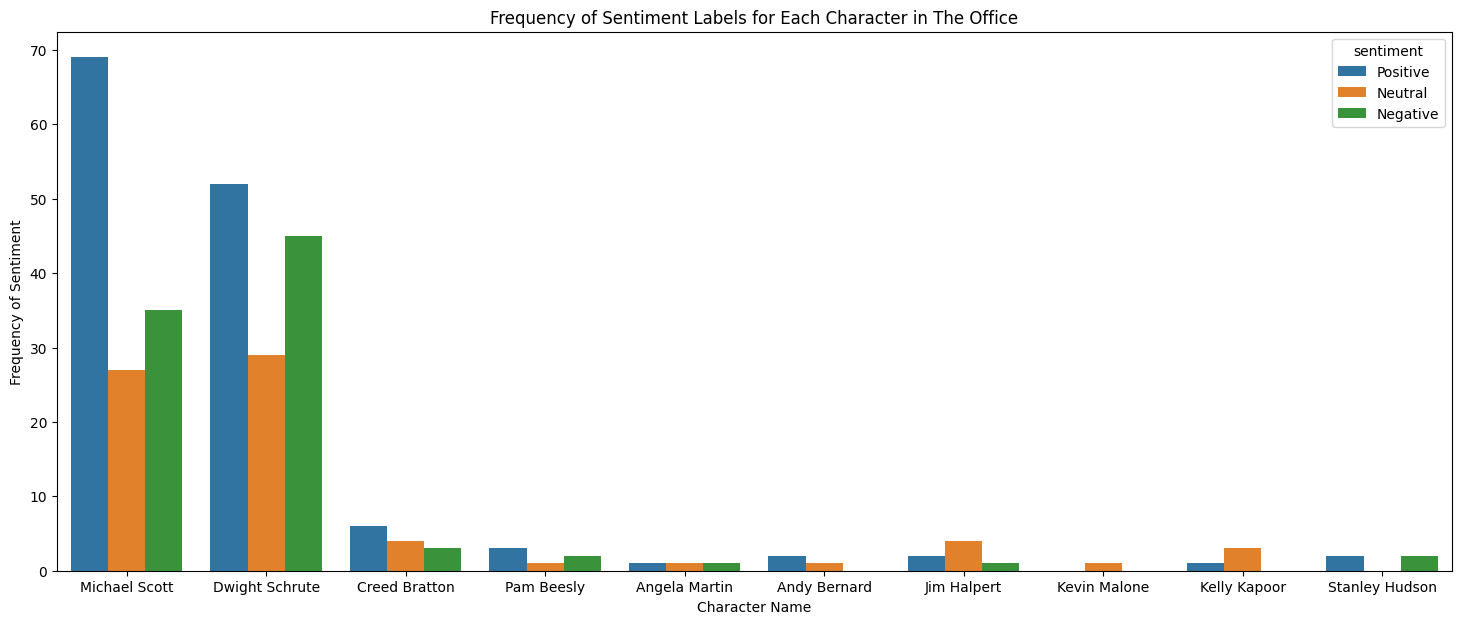

In [131]:
# chart that compares sentiment labels between characters in The Office
figsize = (1.8 * len(quotes_labels_df['character'].unique()), 7)
plt.figure(figsize=figsize)
sns.countplot(data=quotes_labels_df, x="character", hue='sentiment')
plt.xlabel('Character Name')
plt.ylabel('Frequency of Sentiment')
plt.title(
    'Frequency of Sentiment Labels for Each Character in The Office')
plt.show()

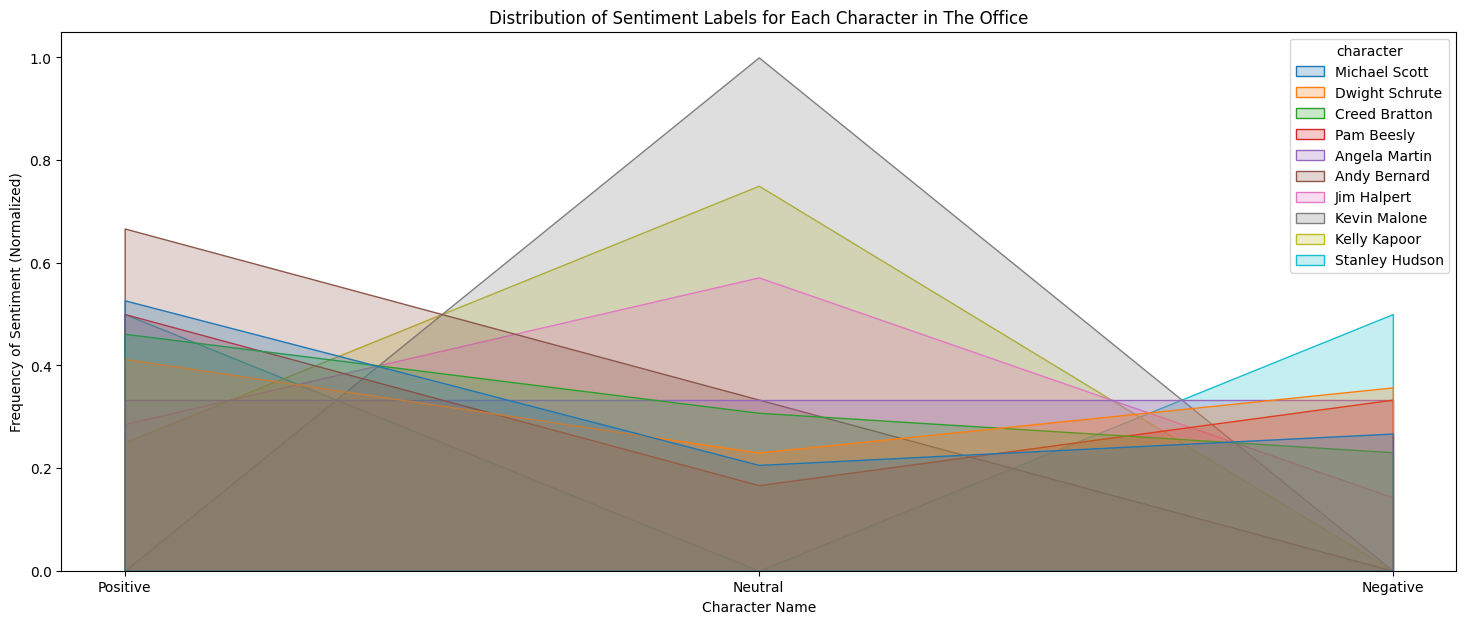

In [132]:
# Return a chart that compares the distribution
# of sentiment scores between characters' quotes.
figsize = (1.8 * len(quotes_labels_df['character'].unique()), 7)
plt.figure(figsize=figsize)
plt.xlabel('Character Name')
plt.ylabel('Frequency of Sentiment (Normalized)')
plt.title(
    'Distribution of Sentiment Labels for Each Character in The Office')
# use poly to help see each character's distribution
sns.histplot(data=quotes_labels_df, x='sentiment', hue='character',
             element="poly", stat="density", common_norm=False,
             discrete=True)
plt.show()